# Tên bài: Thực hiện thống kê mô tả trên tập dữ liệu về phân loại chất lượng rượu đỏ.

## Bài làm


### import thư viện cần thiết và đọc file

In [3]:
# Load thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


du_lieu_ruou = pd.read_csv("data/winequality-red.csv", sep=',')


# 2) Nhìn nhanh cấu trúc
print(du_lieu_ruou.shape)         # số dòng/cột
print(du_lieu_ruou.columns.tolist())
du_lieu_ruou.head()
du_lieu_ruou.info()
du_lieu_ruou.describe()


(1599, 12)
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Nhận thấy:
+ số mẫu: 1599 
+ số thuộc tính: 12 cột ( 11 cột biến số thực và 1 cột  quality)
+ không có thấy dữ liệu bị missing

Các biến đầu vào: 
+ fixed acidity: trung bình ~8.3, min khoảng 4.6, max ~15.9. Phân bố rộng, có outliers ở mức cao.

+ volatile acidity: trung bình ~0.53. Biến này thường có tương quan âm với chất lượng (nhiều acid bay hơi → vị khó chịu).

+ citric acid: nhiều giá trị bằng 0 (không có acid citric), một số mẫu có giá trị cao (max ~1).

+ residual sugar: đa phần thấp (median ~2.2), nhưng max lên tới ~15 → có outliers lệch phải.

+ chlorides: trung bình ~0.09, nhưng max ~0.61 → cũng có vài outliers.

+ free/total sulfur dioxide: thường tập trung thấp, nhưng có giá trị cao hơn nhiều so với trung bình → khả năng lệch phải.

+ density: quanh 0.996–0.998, thay đổi nhỏ, liên quan chặt tới residual sugar và alcohol.

+ pH: nằm trong khoảng hẹp ~2.7–4.0, trung bình ~3.3.

+ sulphates: đa phần ~0.5–0.6, có outliers cao tới >2.

+ alcohol: trung bình ~10.4, min ~8, max ~14.9. Phân bố lệch phải (có một số mẫu rượu có độ cồn cao).

### Thống kê và phân bố các thuộc tính

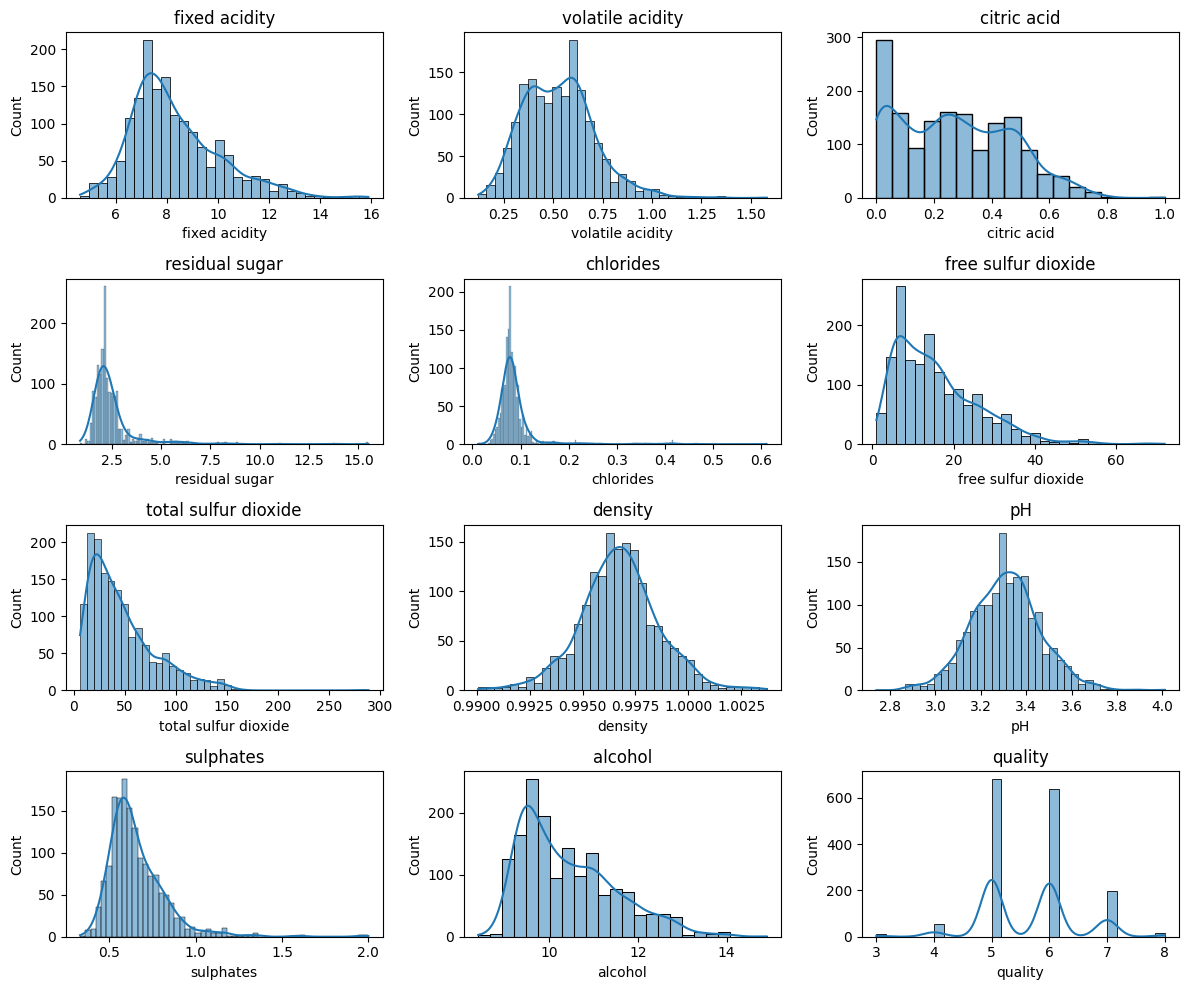

In [4]:
# Vẽ histogram cho các cột numeric chính
cols = du_lieu_ruou.select_dtypes(include='number').columns.tolist()
plt.figure(figsize=(12,10))
for i, c in enumerate(cols):
    plt.subplot(4,3,i+1)
    sns.histplot(du_lieu_ruou[c], kde=True)
    plt.title(c)
plt.tight_layout()


Nhận thấy: 
+ Những biến có phân phối lệch mạnh (ví dụ: residual sugar, sulphates, free sulfur dioxide) có thể cần được xử lý đặc biệt trong các mô hình phân tích (chẳng hạn như log transformation).

+ Biến quality rõ ràng là một yếu tố quan trọng, vì nó có sự phân phối phân loại rõ rệt, có thể ảnh hưởng đến các biến khác trong bộ dữ liệu.

+ Các biến khác như alcohol, citric acid, và pH có vẻ như phân phối gần chuẩn, có thể sẽ dễ dàng hơn trong việc áp dụng các mô hình thống kê và phân tích.

### Kiểm tra outliers ( IQR method)

In [10]:
def outliers_iqr(s, k=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k*iqr
    upper = q3 + k*iqr
    return s[(s < lower) | (s > upper)]

# ví dụ
out_alc = outliers_iqr(du_lieu_ruou['alcohol'])
len_out_alc = len(out_alc)
print("Alcohol outliers:", len_out_alc, "         tỷ lệ:", len_out_alc/len(du_lieu_ruou)*100, "%")

out_volatile = outliers_iqr(du_lieu_ruou['volatile acidity'])
len_out_vol = len(out_volatile)
total_samples = len(du_lieu_ruou['volatile acidity']) # Lấy tổng số mẫu
ratio_vol = len_out_vol / total_samples * 100
print("Volatile acidity outliers:", len(out_volatile), "tỷ lệ:", ratio_vol, " %")


Alcohol outliers: 13          tỷ lệ: 0.8130081300813009 %
Volatile acidity outliers: 19 tỷ lệ: 1.188242651657286  %


Nhận thấy:
+ 'Alcohol': Phát hiện 13 ngoại lai, chiếm ≈0.81% tổng số dữ liệu. Tỷ lệ này rất thấp, cho thấy đặc trưng này có sự phân bố rất sạch và tập trung.
+ 'Volatile acidity': Phát hiện 19 ngoại lai, chiếm ≈ 1.188% tổng số dữ liệu 

### Tương quan với quality

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


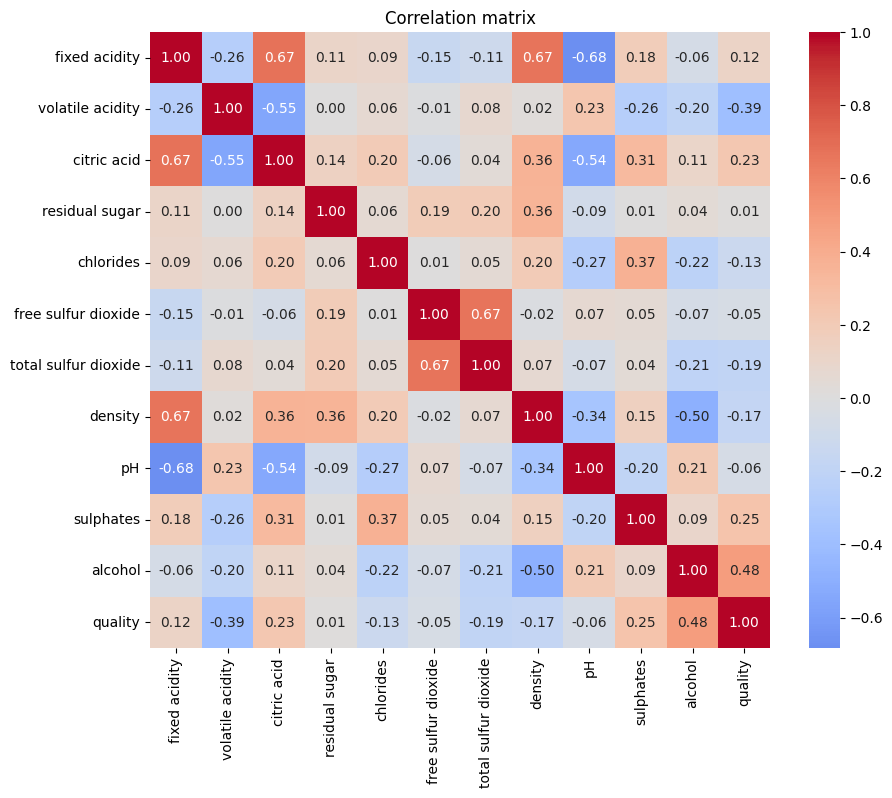

In [11]:
corr = du_lieu_ruou.corr()
corr_quality = corr['quality'].sort_values(ascending=False)
print(corr_quality)
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation matrix")
plt.show()


=> Các đặc trưng 'alcohol' (dương mạnh) và 'volatile acidity' (âm mạnh) là hai yếu tố có ảnh hưởng tuyến tính rõ rệt nhất đến việc đánh giá chất lượng rượu.

### So sánh mean vs median 

In [12]:
for c in ['alcohol','volatile acidity','residual sugar','sulphates']:
    s = du_lieu_ruou[c].dropna()
    print(c, "mean=", s.mean(), "median=", s.median(), "skew=", s.skew())


alcohol mean= 10.422983114446529 median= 10.2 skew= 0.8608288068888538
volatile acidity mean= 0.5278205128205128 median= 0.52 skew= 0.6715925723840199
residual sugar mean= 2.53880550343965 median= 2.2 skew= 4.54065542590319
sulphates mean= 0.6581488430268917 median= 0.62 skew= 2.4286723536602945


Nhận thấy:
+ Tất cả các đặc trưng được kiểm tra đều có phân phối lệch dương (Skew > 0), nghĩa là Mean > Median. Điều này cho thấy dữ liệu có xu hướng tập trung ở các giá trị thấp và có một "đuôi" kéo dài về phía các giá trị cao.

+ Độ lệch là nghiêm trọng đối với 'residual sugar' (4.54) và 'sulphates' (2.42). Với những đặc trưng này, giá trị Median (Trung vị) là thước đo vị trí trung tâm đáng tin cậy hơn so với Mean (Trung bình), vì Median ít bị ảnh hưởng bởi các giá trị ngoại lai và độ lệch.

+ 'alcohol' và 'volatile acidity' có độ lệch nhẹ hơn (dưới 1.0), cho thấy phân phối của chúng gần với phân phối chuẩn hơn so với hai đặc trưng còn lại.

## Kết thúc